In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [46]:
data = pd.read_csv("iris.csv")
df = data.copy()
df.drop("Id" , axis = 1 , inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
df.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [50]:
X = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
y = df[["Species"]]
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [52]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
y = lbe.fit_transform(y)
y = pd.DataFrame(y , columns=["Species"])
y.head()

c:\Users\Sehmus\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Species
0,0
1,0
2,0
3,0
4,0


In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = X.columns
X = sc.fit_transform(X)
X = pd.DataFrame(X , columns= cols)
X.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


c:\Users\Sehmus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


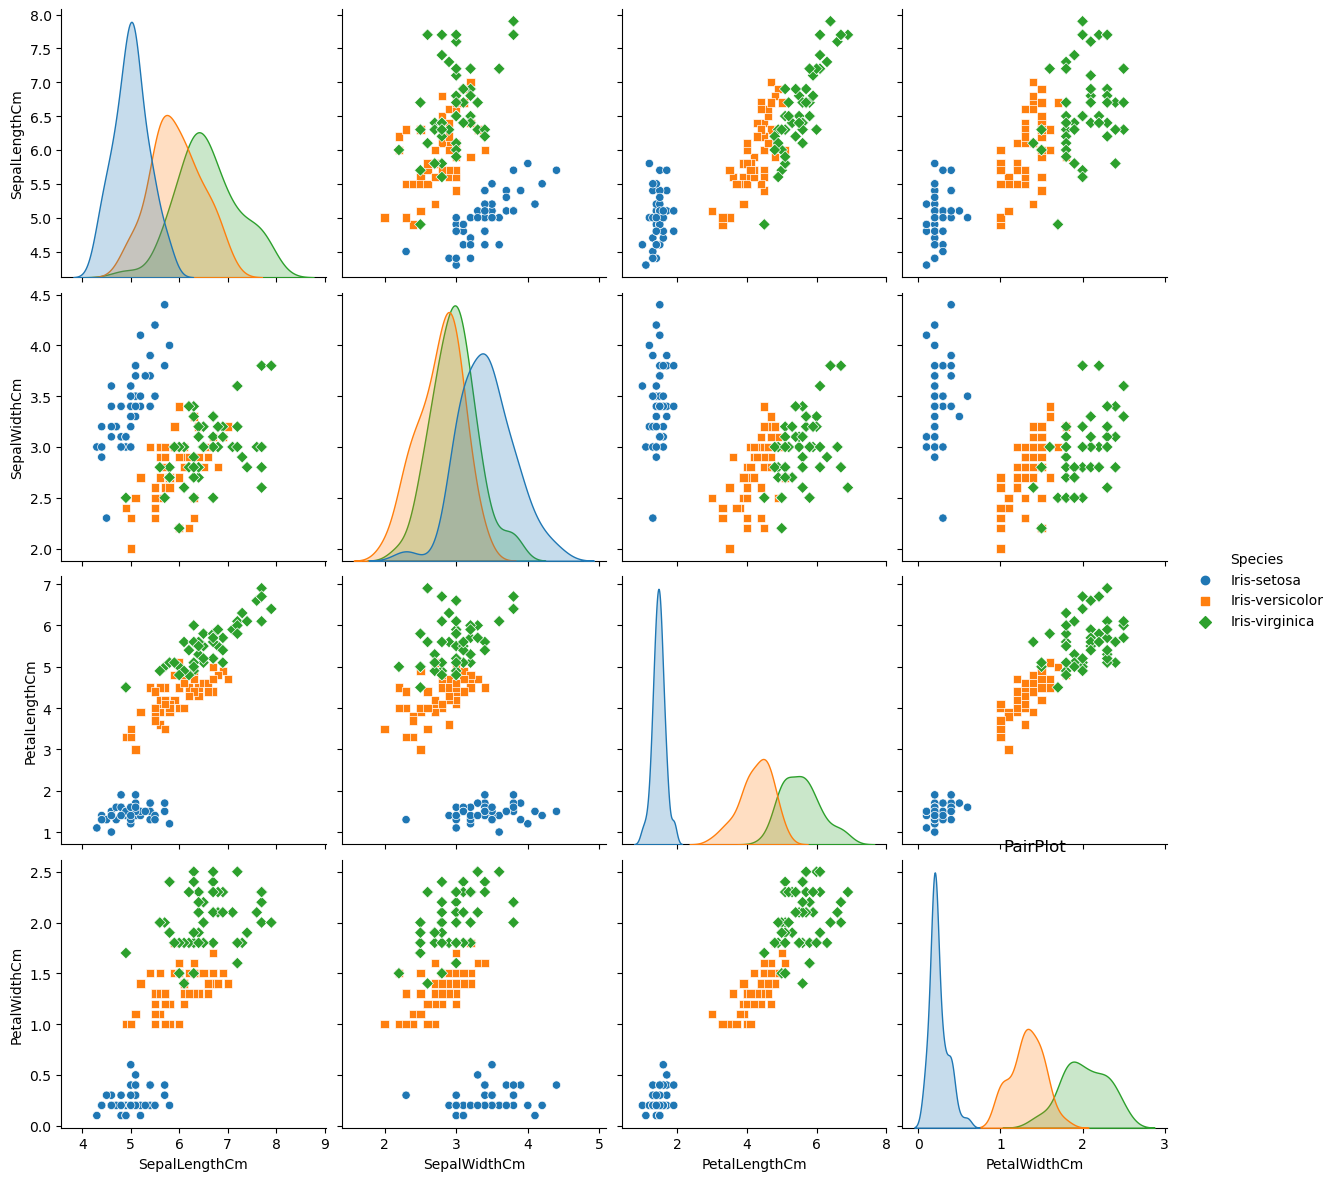

In [54]:

sns.pairplot(df , hue = "Species" , size = 3 , markers = ["o","s","D"])
plt.title("PairPlot")
plt.show()

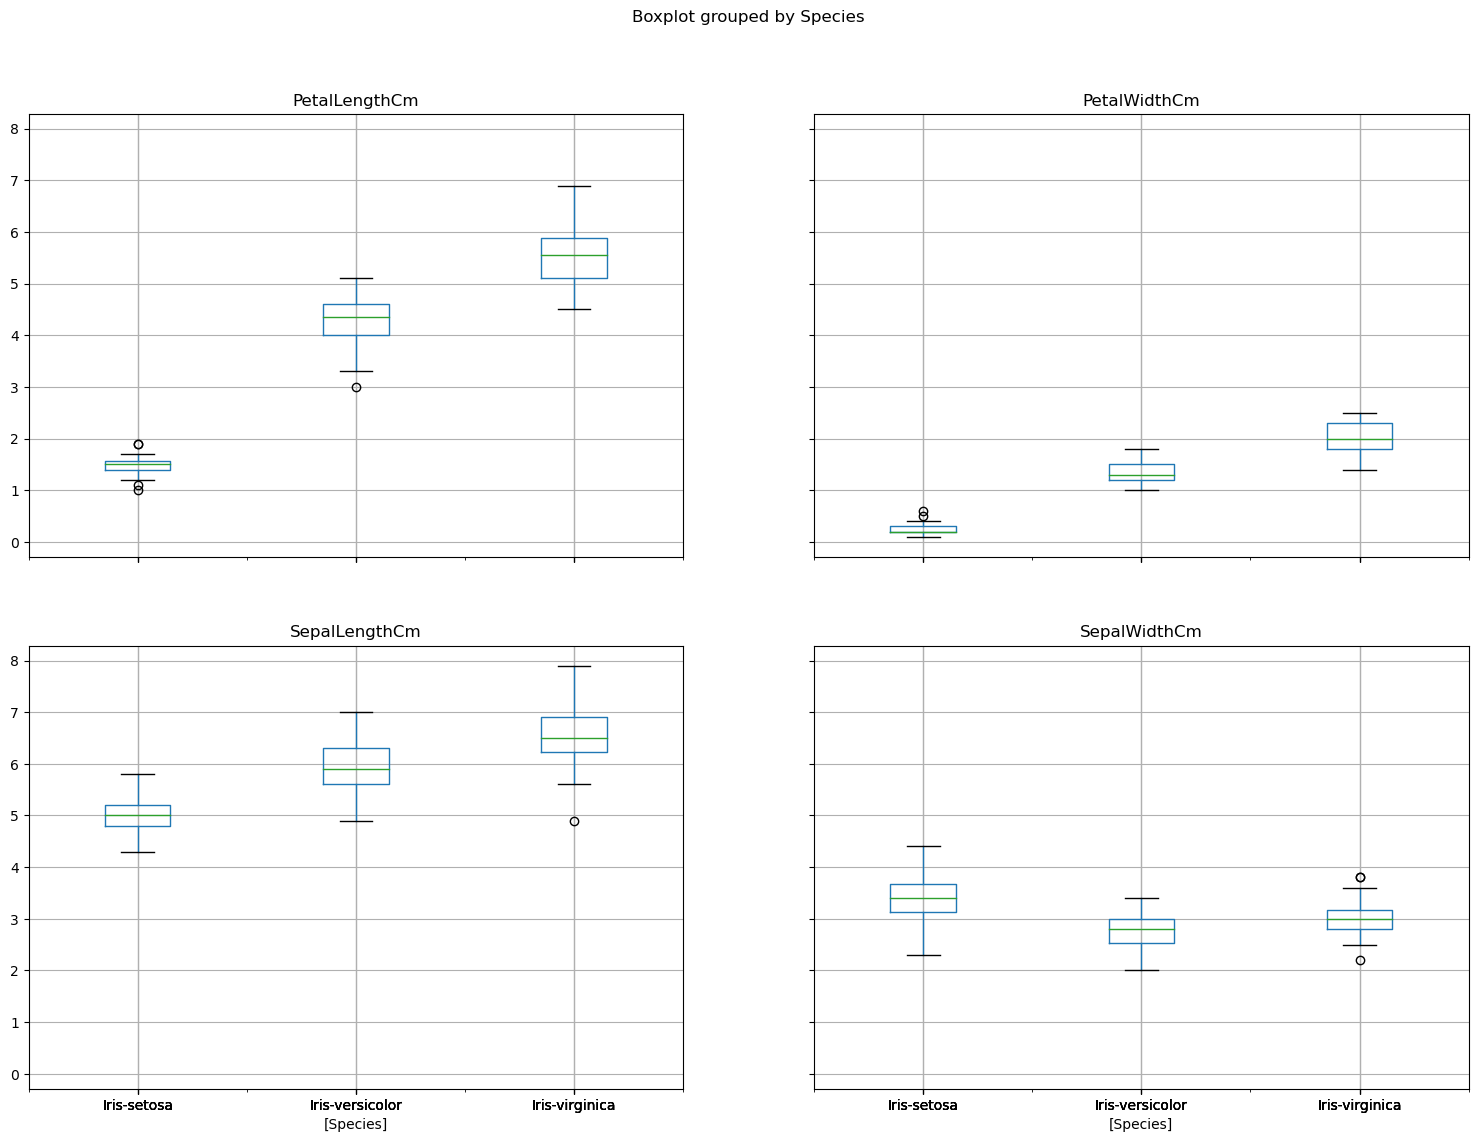

In [55]:
df.boxplot(by = "Species" , figsize = (18,13))
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [57]:

def sklearn_knn(X:pd.DataFrame , y: pd.DataFrame , n :int):
    X_train , X_test , y_train , y_test = train_test_split(X , y.values.ravel() , test_size = 0.3 , random_state= 42)
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = accuracy_score(y_test , y_pred)
    return score * 100


In [60]:
import math 
n = math.floor(math.sqrt(len(df)))
scores = []
for n_neighbor in range(1 , n + 1):
    score = sklearn_knn(X , y , n_neighbor)
    scores.append(score)
scores

[97.77777777777777,
 97.77777777777777,
 100.0,
 97.77777777777777,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0]

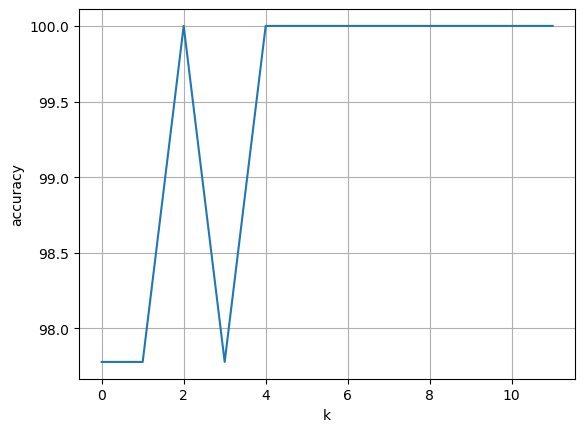

In [62]:
plt.plot(scores)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()